<a href="https://colab.research.google.com/github/boropx999/hello-world/blob/main/10Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [ ]:
%cd "gdrive/MyDrive/CNN1/fruit"

/content/gdrive/MyDrive/CNN1/fruit


In [ ]:
%ls

test/  train/  validation/


In [ ]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(256,256,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN1/fruit/train',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 400 images belonging to 10 classes.


In [ ]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/CNN1/fruit/test',
                                                 target_size = (256,256),
                                                 batch_size = 32,
                                                 class_mode =  'categorical')

Found 200 images belonging to 10 classes.


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_set,epochs = 20,validation_data=test_set,verbose = 1)

Epoch 1/20
13/13 [==============================] - 216s 16s/step - loss: 3.0496 - accuracy: 0.1225 - val_loss: 2.1880 - val_accuracy: 0.1300
Epoch 2/20
13/13 [==============================] - 94s 7s/step - loss: 2.1236 - accuracy: 0.1525 - val_loss: 2.0536 - val_accuracy: 0.1900
Epoch 3/20
13/13 [==============================] - 102s 8s/step - loss: 1.9865 - accuracy: 0.2275 - val_loss: 2.0447 - val_accuracy: 0.2150
Epoch 4/20
13/13 [==============================] - 94s 7s/step - loss: 1.9123 - accuracy: 0.2875 - val_loss: 1.9217 - val_accuracy: 0.2150
Epoch 5/20
13/13 [==============================] - 99s 8s/step - loss: 1.8245 - accuracy: 0.3425 - val_loss: 1.9327 - val_accuracy: 0.2700
Epoch 6/20
13/13 [==============================] - 94s 7s/step - loss: 1.6059 - accuracy: 0.3950 - val_loss: 1.9461 - val_accuracy: 0.3250
Epoch 7/20
13/13 [==============================] - 95s 7s/step - loss: 1.5470 - accuracy: 0.4475 - val_loss: 1.9834 - val_accuracy: 0.3150
Epoch 8/20
13/13 

In [ ]:
training_set.class_indices

{'chomchom': 0,
 'chuoi': 1,
 'duahau': 2,
 'khe': 3,
 'na': 4,
 'oi': 5,
 'saurieng': 6,
 'thanhlong': 7,
 'thom': 8,
 'xoai': 9}

In [ ]:
from keras import models
model.save('Final.h5')
model_CNN=models.load_model('Final.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


[3]


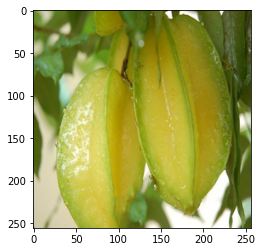

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/khe/image 61.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/khe/image 61.jpg')
imgplot = plt.imshow(img)
plt.show()

[4]


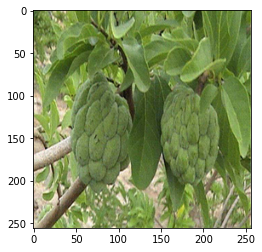

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/na/image 61.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/na/image 61.jpg')
imgplot = plt.imshow(img)
plt.show()

[5]


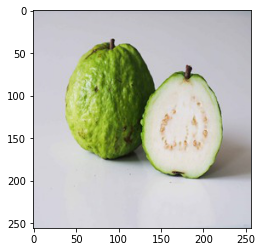

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/oi/oi(1).jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/oi/oi(1).jpg')
imgplot = plt.imshow(img)
plt.show()

[6]


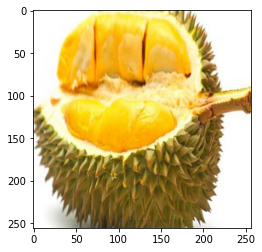

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/saurieng/image 61.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/saurieng/image 61.jpg')
imgplot = plt.imshow(img)
plt.show()

[7]


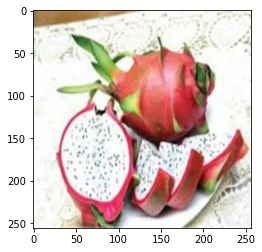

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/thanhlong/image 61.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/thanhlong/image 61.jpg')
imgplot = plt.imshow(img)
plt.show()

[8]


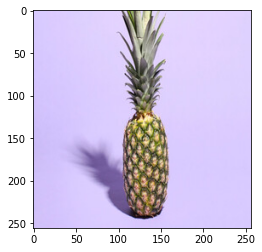

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/thom/image 61.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/thom/image 61.jpg')
imgplot = plt.imshow(img)
plt.show()

[9]


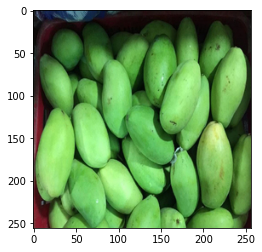

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/xoai/image 61.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/xoai/image 61.jpg')
imgplot = plt.imshow(img)
plt.show()

[2]


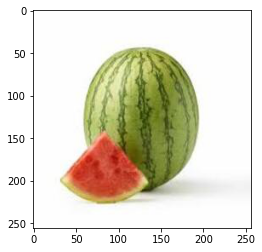

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/duahau/w(1).jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/duahau/w(1).jpg')
imgplot = plt.imshow(img)
plt.show()

[1]


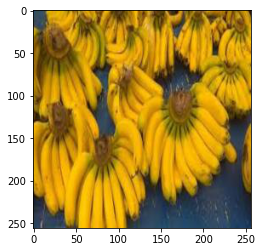

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/chuoi/images(1).jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/chuoi/images(1).jpg')
imgplot = plt.imshow(img)
plt.show()

[0]


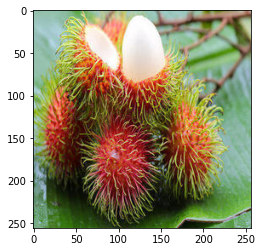

In [ ]:
test_image = image.load_img('/content/gdrive/MyDrive/CNN1/fruit/validation/chomchom/chomch(1).jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/MyDrive/CNN1/fruit/validation/chomchom/chomch(1).jpg')
imgplot = plt.imshow(img)
plt.show()